In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import numpy as np
import tensorflow as tf
import os, sys, time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import utils, optimization, metrics, plot, data
import data.transformation as transformation
from data.Dataset_3d import Dataset_3d
from data.generate_comso_dataset import *

from model import WGanModel, LapGanModel
from gan import CosmoGAN

In [3]:
ns = 32
nsamples = 1000
k = 10

In [4]:
import os
dir = os.getcwd()
print(dir)

/home/ankit/Desktop/ETH/FourthSemester/issues/deconv_ugly_code/CodeGAN


## Create 3d histogram from entire bigger cube

In [114]:
main_2d()

Pasing folder: ../../../nbody/Box_350Mpch_0
 * Loading file out_z0p000.0... 
   loadable_keys: ['pos', 'vel', 'mass']
   properties: {'a': 1.0, 'omegaL0': 0.724, 'omegaM0': 0.276, 'h': 0.7, 'boxsize': Unit("3.50e+02 Mpc a h**-1"), 'time': Unit("9.87e-03 s Mpc a**1/2 km**-1 h**-1")}
 * Generate histogram for out_z0p000.0... 
 * Loading file out_z0p000.1... 
   loadable_keys: ['pos', 'vel', 'mass']
   properties: {'a': 1.0, 'omegaL0': 0.724, 'omegaM0': 0.276, 'h': 0.7, 'boxsize': Unit("3.50e+02 Mpc a h**-1"), 'time': Unit("9.87e-03 s Mpc a**1/2 km**-1 h**-1")}
 * Generate histogram for out_z0p000.1... 
 * Loading file out_z0p000.2... 
   loadable_keys: ['pos', 'vel', 'mass']
   properties: {'a': 1.0, 'omegaL0': 0.724, 'omegaM0': 0.276, 'h': 0.7, 'boxsize': Unit("3.50e+02 Mpc a h**-1"), 'time': Unit("9.87e-03 s Mpc a**1/2 km**-1 h**-1")}
 * Generate histogram for out_z0p000.2... 
 * Loading file out_z0p000.3... 
   loadable_keys: ['pos', 'vel', 'mass']
   properties: {'a': 1.0, 'omegaL0':

0

## Display the 3d histogram

In [22]:
hists_3d, _ = data.load.load_data_from_dir('../pre_processed_data/', k=10)
print(hists_3d[0].shape)

x,y,z = hists_3d[0,:].nonzero() #display only non zero points from the histogram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x, ys=y, zs=z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("3d histogram")
plt.show()

(256, 256, 256)


KeyboardInterrupt: 

## Augmentation

In [7]:
dataset =  data.load.load_3d_dataset(spix=512, augmentation=True)
print(dataset.N)

2


In [81]:
images = np.arange(128).reshape(2,4,4,4)
print(images)
t = utils.compose2(transformation.rotate_3d, transformation.translate_3d)
dataset = Dataset_3d(images, spix=2, shuffle=False, transform=None)

[[[[  0   1   2   3]
   [  4   5   6   7]
   [  8   9  10  11]
   [ 12  13  14  15]]

  [[ 16  17  18  19]
   [ 20  21  22  23]
   [ 24  25  26  27]
   [ 28  29  30  31]]

  [[ 32  33  34  35]
   [ 36  37  38  39]
   [ 40  41  42  43]
   [ 44  45  46  47]]

  [[ 48  49  50  51]
   [ 52  53  54  55]
   [ 56  57  58  59]
   [ 60  61  62  63]]]


 [[[ 64  65  66  67]
   [ 68  69  70  71]
   [ 72  73  74  75]
   [ 76  77  78  79]]

  [[ 80  81  82  83]
   [ 84  85  86  87]
   [ 88  89  90  91]
   [ 92  93  94  95]]

  [[ 96  97  98  99]
   [100 101 102 103]
   [104 105 106 107]
   [108 109 110 111]]

  [[112 113 114 115]
   [116 117 118 119]
   [120 121 122 123]
   [124 125 126 127]]]]


In [89]:
print(dataset.N)
it = dataset.iter(5)

for idx, batch_real in enumerate(it):
    print('idx=',idx)

16
idx= 0
idx= 1
idx= 2


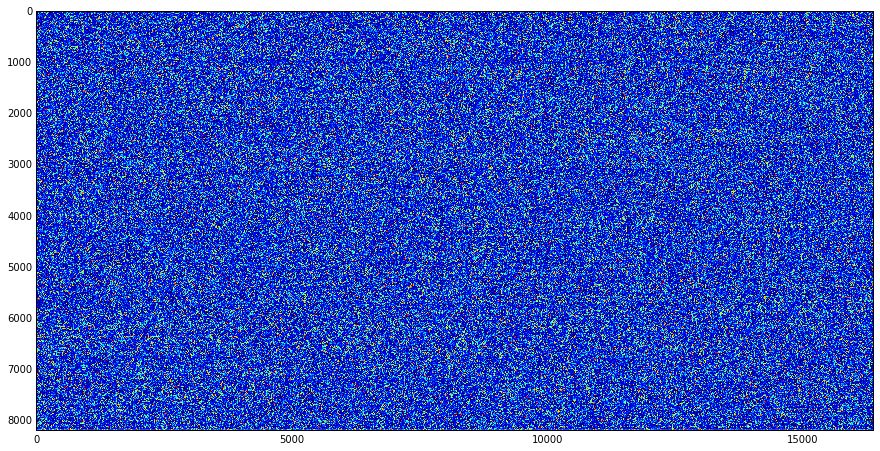

In [8]:
#print(dataset._X[1])
for i in range(1):
    plt.figure(figsize=(15,15))
    plot.tile_and_plot_3d_image(dataset._X[i])